# Chapter 5 - Common Probability Distributions

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
%matplotlib inline
import math

# Probability Mass Function (PMF)
It describes the probability of discrete events.

### 2 Dices Experiment

The following code snippet can simulate the experiment as we know that each dice
generates the possible outcome equally. First, generate all the possible outcomes:

In [6]:
dice = [1,2,3,4,5,6]               # Define the possible outcomes of a single dice roll
probs = [1/6,1/6,1/6,1/6,1/6,1/6]  # Assign equal probability (1/6) to each face of the dice

# Compute all possible sums from rolling two dice
sums = sorted(                                # Sort the unique sums in ascending order
    np.unique([dice[i] + dice[j]              # Add outcomes of two dice (i-th and j-th roll)
               for i in range(6)              # Loop over all possible outcomes of the first dice
               for j in range(6)]))           # Loop over all possible outcomes of the second dice

The following code then calculates all the associated probabilities. I iterated every possible
pair of outcomes and added the probability product to the corresponding result. 

In [8]:
from collections import OrderedDict  # Import OrderedDict to maintain insertion order for results

# Initialize an ordered dictionary to store probabilities for each sum
res = OrderedDict({s: 0 for s in sums})  # Start all sums with 0 probability

# Calculate probabilities for each sum value
for i in range(6):                       # Loop over the first dice
    for j in range(6):                   # Loop over the second dice
        s = dice[i] + dice[j]            # Calculate the sum of the two dice
        res[s] += probs[i] * probs[j]    # Increment probability for the corresponding sum

# Display the results
print("Sum Value : Probability")
for s, p in res.items():
    print(f"{s:>5}      : {p:.3f}")

Sum Value : Probability
    2      : 0.028
    3      : 0.056
    4      : 0.083
    5      : 0.111
    6      : 0.139
    7      : 0.167
    8      : 0.139
    9      : 0.111
   10      : 0.083
   11      : 0.056
   12      : 0.028


In [9]:
sum(res.values())

1.0000000000000002

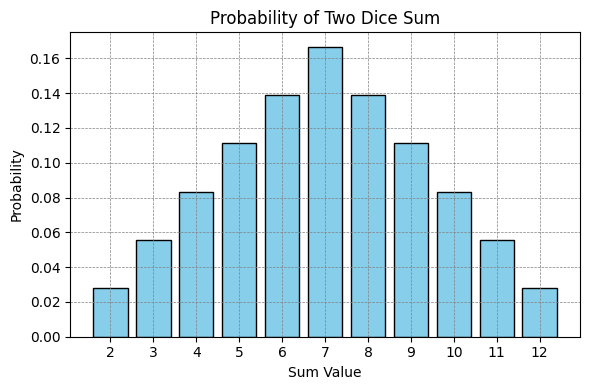

In [10]:
# Extract the sum values (keys) and their probabilities (values) from the ordered dictionary
sum_values = list(res.keys())       # Get the sum values
probabilities = list(res.values())  # Get the corresponding probabilities

# Create the plot
plt.figure(figsize=(6, 4))                                              # Set the figure size
plt.bar(sum_values, probabilities, color='skyblue', edgecolor='black')  # Create a bar plot
plt.xlabel('Sum Value')                                                 # Label for the x-axis
plt.ylabel('Probability')                                               # Label for the y-axis
plt.title('Probability of Two Dice Sum')                                # Title for the plot
plt.xticks(sum_values)                                                  # Ensure all sum values are shown on the x-axis
plt.grid(visible=True, linestyle='--', linewidth=0.5, color='grey')     # Add a grid for better readability

plt.tight_layout()  # Adjust layout
plt.show()          # Display the plot

# Probability Density Function (PDF)
It describes the probability of continous cases.

Suppose the PDF of the bus' arrival time looks as follows. The shaded region has an area of 1. The bus has the highest
probability of arriving at 8:30 and a lower probability of arriving too early or too late. This is a terrible bus service anyway.

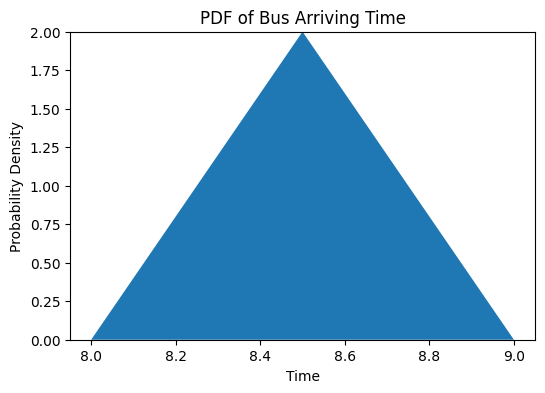

In [13]:
plt.figure(figsize=(6,4))    # Set the figure size

plt.fill_between([8, 8.5, 9],  # Specify x-coordinates for the shaded region
                 [0, 2,   0])  # Specify y-coordinates for the shaded region
plt.ylim(0,2)                  # Set the y-axis limits to range from 0 to 2

plt.title("PDF of Bus Arriving Time")  # Add a title to the plot
plt.xlabel("Time")                     # Label the x-axis as 'Time'
plt.ylabel("Probability Density");     # Label the y-axis as 'Probability Density'

Only the integrated **Area Under the Curve (AUC)** represents a meaningful probability. For example, in the previous PDF,
the probability that the bus will arrive between 8:24 A.M. (8.4 on the x-axis) and 8:36
A.M. (8.6 on the x-axis) is the area of the central lightly shaded part, as shown in the
following graph:

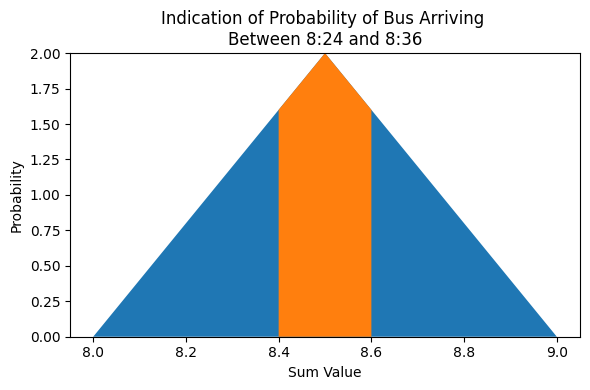

In [15]:
fig = plt.figure(figsize=(6,4))  # Set the figure size to 6x4 inches

plt.fill_between([8, 8.5, 9],  # Define the x-coordinates for the first shaded region
                 [0, 2,   0])  # Define the y-coordinates for the first shaded region
plt.ylim(0,2)                  # Set the y-axis limits to range from 0 to 2

plt.fill_between([8.4, 8.4, 8.5, 8.6, 8.6], # Define the x-coordinates for the second shaded region
                 [0,   1.6, 2,   1.6, 0])   # Define the y-coordinates for the second shaded region

plt.title("Indication of Probability of Bus Arriving \nBetween 8:24 and 8:36")  # Add a title to the plot
plt.xlabel("Sum Value")                                                         # Label the x-axis as 'Sum Value'
plt.ylabel("Probability")                                                       # Label the y-axis as 'Probability'

plt.tight_layout()  # Adjust the layout

### Probability and Cumulative Distribution Function (CDF)

Integrating a Probability Density Function (PDF) up to a certain value \( x \) gives you the Cumulative Distribution Function (CDF), which is defined as:

$$
F_X(x) = \int_{-\infty}^{x} f_X(x) \,dx
$$

The CDF takes values between 0 and 1. A CDF contains all the information that a PDF contains. In some cases, it is easier to use a CDF rather than a PDF to solve specific problems.

# Bernoulli Distribution

The Probability Mass Function (PMF) for a Bernoulli random variable \( X \) is given by:

$$
f_X(x) = p^x (1 - p)^{(1 - x)}
$$

Where:
- \( p \) is the probability of success.
- \( x \) is the value of the random variable ( x = 0  or  x = 1 ).

The following code performs a computational experiment with p = 0.7 and sample
size = 1000:

In [20]:
p = 0.7                                               # Set the probability for generating True values in the sample
samples = [random.random() < p for _ in range(1000)]  # Generate 1000 samples with a True probability of 0.7

# Calculate mean and variance of the samples
mean = np.mean(samples)
variance = np.var(samples)

# Print results in a readable format
print(f"Sample Mean: {mean:.3f}")
print(f"Sample Variance: {variance:.3f}")

Sample Mean: 0.692
Sample Variance: 0.213


# Binomial Distribution
Binomial distribution is built upon the Bernoulli distribution. Its outcome is the sum of a
collection of independent Bernoulli experiments.

Let's say you do n Bernoulli experiments, each with a probability of success p. Then wesay the outcome X follows a binomial distribution parametrized by n and p. The outcomeof the experiment can take any value k as long as k is smaller than or equal to n. The PMFreads as follows:

$$
f(k, n, p) = P(X = k) = \frac{n!}{k!(n-k)!} p^k (1-p)^{n-k}
$$


In [22]:
p = 0.8                          # Set the probability of success
X = [i for i in range(1, 101)]   # Define the range of possible outcomes (1 to 100)
n = 100                          # Total number of trials in the binomial experiment

# Calculate the theoretical PMF for each value in X
Fx = [
    math.factorial(n) / (math.factorial(n - k) * math.factorial(k)) * p**k * (1 - p)**(n - k)
    for k in X
]

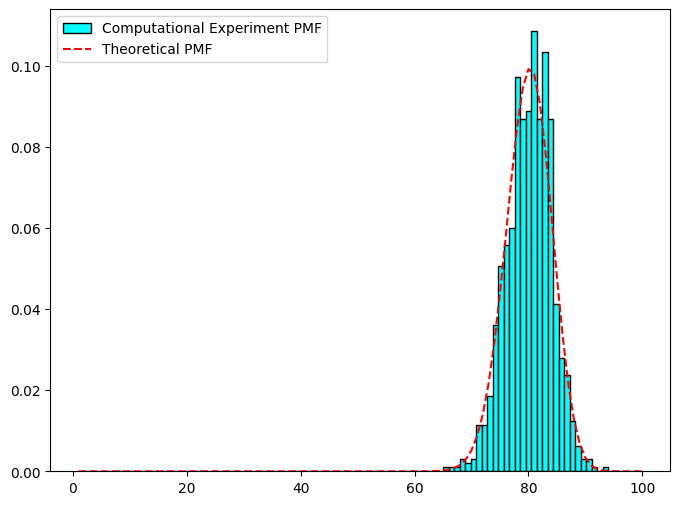

In [23]:
random.seed(2020)                                        # Set the random seed for reproducibility

# Simulate 1000 trials of the binomial experiment
K = []  
for trial in range(1000):  
    k = np.sum([random.random() < p for _ in range(n)])  # Count the number of successes in n trials
    K.append(k)                                          # Append the result to the list of outcomes

# Plot the results
plt.figure(figsize=(8, 6))  # Set the figure size

# Plot the histogram of simulated PMF with density normalization
plt.hist(K, bins=30, density=True, edgecolor='black', color= 'cyan', label="Computational Experiment PMF")  

# Overlay the theoretical PMF
plt.plot(X, Fx, color="r", label="Theoretical PMF", linestyle="--")  

# Add a legend to differentiate between theoretical and experimental results
plt.legend();  

# Poisson Distribution

The Poisson distribution has a PMF as shown in the following equation, where \( \lambda \) is a parameter:

$$
P(X = k) = \frac{e^{-\lambda} \lambda^k}{k!}
$$

- $k $ can take values of positive integers.
- $ \lambda \$ is the expected number of occurrences in a fixed interval.

This distribution might seem rather odd, but it appears frequently in nature. The Poisson distribution can describe the number of times a random event happens during a unit of time. Examples include:
- The number of people calling 911 in the United States every minute.
- The count of gene mutations per unit of time.

The following code snippet plots the theoretical PMF for different values of $ \lambda $:


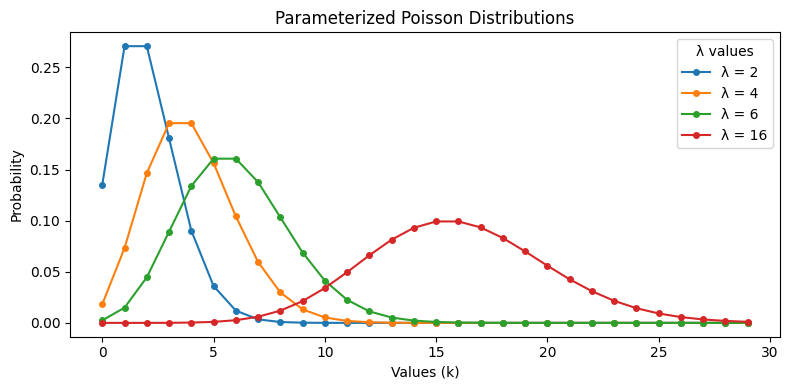

In [25]:
lambdas = [2, 4, 6, 16]                                      # Define the parameter values (λ) for Poisson distributions
K = [k for k in range(30)]                                   # Define a range of k values for the PMF (0 to 29)
plt.figure(figsize=(8, 4))                                   # Set the figure size for the plot

# Loop through each λ and plot the corresponding PMF
for i, l in enumerate(lambdas):  
    plt.plot(
        K,                                                   # The range of k values (x-axis)
        [np.exp(-l) * l**k / math.factorial(k) for k in K],  # Calculate PMF for each k
        label=f"λ = {l}",                                    # Add a legend entry for the current λ
        marker='o',                                          # Use a marker for visibility
        linestyle='-',                                       # Use solid lines for better visualization
        markersize=4                                         # Set the size of markers
    )

plt.legend(title="λ values", loc="upper right")              # Add a legend to the plot
plt.ylabel("Probability")                                    # Set the y-axis label to describe probabilities
plt.xlabel("Values (k)")                                     # Set the x-axis label to describe the k values
plt.title("Parameterized Poisson Distributions")             # Add a title to describe the plot

plt.tight_layout()                                           # Adjust layout for better spacing
plt.show()                                                   # Display the plot

*Poisson distribution with various λ values*

**The mean and variance of Poisson distribution are both λ.**

# Understanding the common continuous probability distribution

## Uniform Distribution

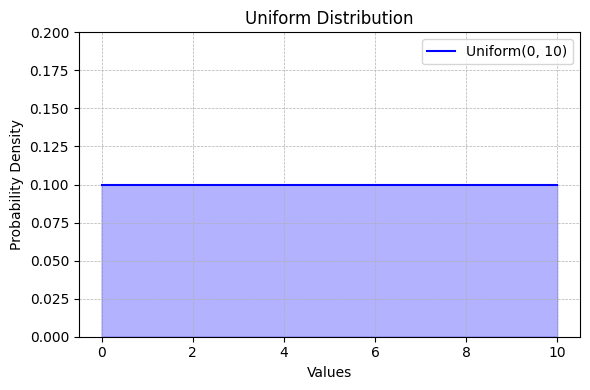

In [30]:
# Define parameters for the uniform distribution
a, b = 0, 10                                             # Define the range of the uniform distribution
x = np.linspace(a, b, 1000)                              # Generate 1000 evenly spaced values between a and b
pdf = np.ones_like(x) / (b - a)                          # Calculate the probability density function (PDF)

# Plot the uniform distribution
plt.figure(figsize=(6, 4))                               # Set the figure size for the plot
plt.plot(x, pdf, label=f"Uniform({a}, {b})", color='blue')  # Plot the PDF
plt.fill_between(x, pdf, alpha=0.3, color='blue')        # Fill the area under the curve for better visualization

# Add labels, title, and grid
plt.xlabel("Values")                                     # Label the x-axis
plt.ylabel("Probability Density")                        # Label the y-axis
plt.title("Uniform Distribution")                        # Add a title to the plot
plt.ylim(0, 0.2)                                         # Set the y-axis range from 0 to 0.2
plt.grid(visible=True, linestyle="--", linewidth=0.5)    # Add a grid to the plot
plt.legend()                                             # Add a legend to describe the plot
plt.tight_layout()                                       # Adjust layout for better spacing
plt.show()                                               # Display the plot

## Exponential Distribution

In nature, it mostly describes the time difference between independent random
distribution. For example, the time between two episodes of lightning in a thunderstorm
or the time between two 911 calls. Recall that the number of 911 calls in a unit of time
follows the Poisson distribution. Exponential distribution and Poisson distribution do
have similarities.

The PDF for the exponential distribution is parameterized by $\lambda$. The value $x$ can only take non-negative values. Its PDF observes the following form:

$$
f(x, \lambda) = \lambda e^{-\lambda x}
$$

Because of the monotonicity of the PDF, the maximal value always happens at $x = 0$, where \(f(0, $\lambda$) = $\lambda$.

The following code snippet plots the PDF for different $\lambda$:

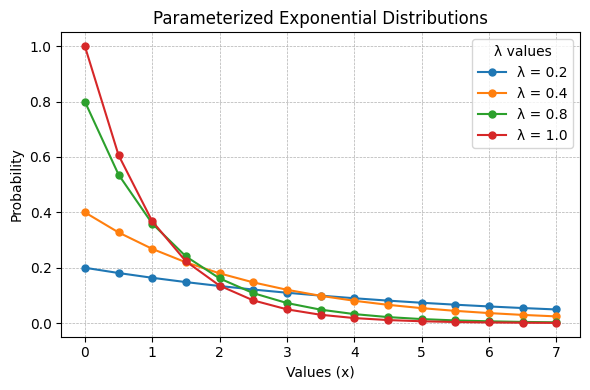

In [34]:
lambdas = [0.2, 0.4, 0.8, 1.0]                           # Define lambda values for exponential distributions
K = [0.5 * k for k in range(15)]                         # Define x values from 0 to 7 with steps of 0.5
plt.figure(figsize=(6, 4))                               # Set figure size for better visualization

# Loop through each lambda and plot the corresponding PDF
for i, l in enumerate(lambdas):
    plt.plot(
        K,                                               # x values (independent variable)
        [np.exp(-l * k) * l for k in K],                 # PDF values calculated for each x
        label=f"λ = {l}",                                # Add a legend label for the current lambda
        marker="o",                                      # Use a circular marker for data points
        linestyle="-",                                   # Use solid lines for the plot
        markersize=5                                     # Set the size of the markers
    )

plt.legend(title="λ values", loc="upper right")          # Add a legend with a title and position it in the top-right corner
plt.ylabel("Probability")                                # Set the y-axis label to describe probabilities
plt.xlabel("Values (x)")                                 # Set the x-axis label to describe x values
plt.title("Parameterized Exponential Distributions")     # Add a title to describe the plot
plt.grid(visible=True, linestyle="--", linewidth=0.5)    # Add gridlines with dashed style for better readability
plt.tight_layout()                                       # Adjust the layout to prevent overlap of labels and title
plt.show()                                               # Display the plot

# Normal Distribution

#### Probability Density Function (PDF)
A one-dimensional normal distribution has a PDF defined as:

$$
f(x) = \frac{1}{\sigma \sqrt{2 \pi}} e^{-\frac{(x - \mu)^2}{2 \sigma^2}}
$$

Where:
- $\mu$ is the mean (expectation) of the distribution.
- $\sigma^2$ is the variance (square of the standard deviation).

#### Standard Normal Distribution
A standard normal distribution is a special case with:
- Mean $\mu$ = 0
- Variance $\sigma^2$ = 1

Its PDF simplifies to:

$$
f(x) = \frac{1}{\sqrt{2 \pi}} e^{-\frac{x^2}{2}}
$$

#### Characteristics of the Normal Distribution
1. **Symmetry**: The standard normal distribution PDF is symmetric with respect to \(x = 0\).
2. **Decay Rate**: The PDF decays faster than an exponential distribution due to its squared form in the exponent.
3. **Transformation**: 
   - The mean $\mu$ shifts the center (axis of symmetry).
   - The variance $\sigma^2$ controls the spread (rate of decay).

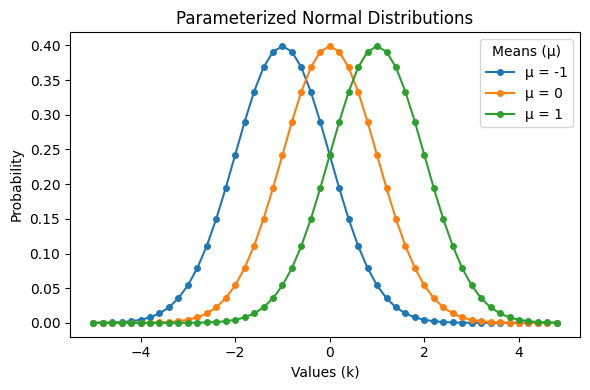

In [36]:
mus = [-1, 0, 1]                      # Define different means for the normal distributions
K = [0.2 * k - 5 for k in range(50)]  # Create a range of x values (K) for plotting the distributions
plt.figure(figsize=(6, 4))            # Set figure size for better readability

# Loop through each mean (mu) and plot the corresponding normal distribution
for i, mu in enumerate(mus):  
    plt.plot(
        K,  # X-axis values
        [1 / (np.sqrt(2 * np.pi)) * np.exp(-(k - mu) ** 2 / 2) for k in K],  # PDF formula
        label=f"μ = {mu}",            # Add a label for the legend indicating the current mean
        marker='o',                   # Use a circle marker for visibility
        linestyle='-',                # Use solid lines for better visualization
        markersize=4                  # Set marker size
    )

plt.legend(title="Means (μ)", loc="upper right")  # Add a legend with a title
plt.ylabel("Probability")                         # Set the y-axis label
plt.xlabel("Values (k)")                          # Set the x-axis label
plt.title("Parameterized Normal Distributions")   # Add a descriptive title

plt.tight_layout()                    # Adjust layout
plt.show()                            # Display the plot